In [12]:
from mmpose.apis import MMPoseInferencer
import cv2
import numpy as np
from PIL import Image

img_path = 'example_images/green/green.jpg'

# instantiate the inferencer using the model alias
inferencer = MMPoseInferencer('rtmw-m_8xb1024-270e_cocktail14-256x192')

# The MMPoseInferencer API employs a lazy inference approach,
# creating a prediction generator when given input
result_generator = inferencer(img_path, show=False)


Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmw/rtmw-dw-l-m_simcc-cocktail14_270e-256x192-20231122.pth


Downloading: "https://download.openmmlab.com/mmpose/v1/projects/rtmw/rtmw-dw-l-m_simcc-cocktail14_270e-256x192-20231122.pth" to C:\Users\Vipin/.cache\torch\hub\checkpoints\rtmw-dw-l-m_simcc-cocktail14_270e-256x192-20231122.pth


Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmdet_m_8xb32-100e_coco-obj365-person-235e8209.pth


In [17]:
def visualize_output(image, keypoints, tup = [], show_neck_angle = False, show_trunk_angle = False, show_upper_arm_angle = False, show_lower_arm_angle = False):
    """
    Visualize the output model on the input image.

    Parameters:
    image (numpy.ndarray): The original image.
    keypoints (numpy.ndarray): Array of keypoints for pose estimation.
    """

    result_image = image.copy()
    i = 0
    
    # Draw keypoints
    for x, y in keypoints:
        color = (255, 0, 0) if i in tup else (0, 255, 0)            
        i += 1
        
        cv2.circle(result_image, (int(x), int(y)), 10, color, -1)
    
    return result_image

def plot_results(image, mode="inline", scale=1):
    """
    Displays an image using either a popup window or inline display.

    Parameters
    ----------
    image : numpy.ndarray or CV2 image
        The image to display.
    mode : str, optional
        The display mode. Must be either "popup" or "inline". If "popup", the image is displayed in a popup window. If "inline", the image is displayed inline in the notebook. Default is "inline".
    scale : float, optional
        The scaling factor for the image. Default is 1.

    Raises
    ------
    ValueError
        If the mode is not "popup" or "inline".
    """
    
    if type(image) is np.ndarray:
        image = Image.fromarray(image)
    
    if mode == "popup":
        pass
    elif mode == "inline":
        if type(image) == np.ndarray:
            # Convert from BGR to RGB (because OpenCV uses BGR order for color channels, whereas PIL uses RGB.)
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = Image.fromarray(image_rgb)
    else:
        raise ValueError("Mode must be either 'popup' or 'inline'")

    if type(image) is np.ndarray:
        cv2.imshow('Image', image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        width, height = image.size
        display(image.resize((int(width*scale), int(height*scale))))

In [14]:
result = next(result_generator)

In [15]:
result

defaultdict(list,
            {'visualization': None,
             'predictions': [[{'keypoints': [[1525.8458251953125,
                  1522.3211669921875],
                 [1614.3880615234375, 1395.8321533203125],
                 [1519.5213623046875, 1408.4810791015625],
                 [1943.25927734375, 1383.183349609375],
                 [1880.0147705078125, 1408.4810791015625],
                 [2234.183837890625, 2059.899169921875],
                 [1734.552490234375, 1895.4635009765625],
                 [1962.232666015625, 3154.0283203125],
                 [1500.5479736328125, 2433.04150390625],
                 [1089.458984375, 2951.64599609375],
                 [1215.947998046875, 2591.152587890625],
                 [1829.419189453125, 3375.3837890625],
                 [1481.57470703125, 3027.539306640625],
                 [754.2633666992188, 3723.228515625],
                 [608.8010864257812, 3723.228515625],
                 [305.2276611328125, 3723.228515625]

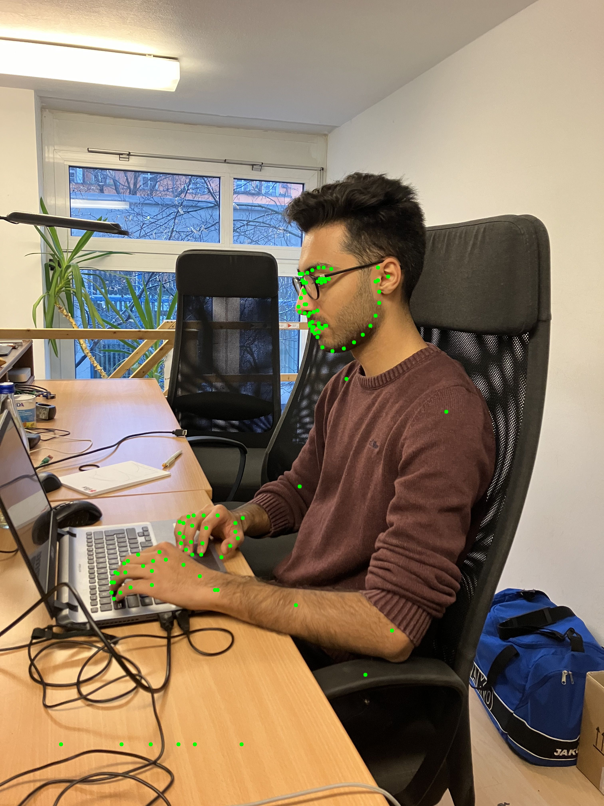

In [18]:
keypoints = [[1525.8458251953125,
                  1522.3211669921875],
                 [1614.3880615234375, 1395.8321533203125],
                 [1519.5213623046875, 1408.4810791015625],
                 [1943.25927734375, 1383.183349609375],
                 [1880.0147705078125, 1408.4810791015625],
                 [2234.183837890625, 2059.899169921875],
                 [1734.552490234375, 1895.4635009765625],
                 [1962.232666015625, 3154.0283203125],
                 [1500.5479736328125, 2433.04150390625],
                 [1089.458984375, 2951.64599609375],
                 [1215.947998046875, 2591.152587890625],
                 [1829.419189453125, 3375.3837890625],
                 [1481.57470703125, 3027.539306640625],
                 [754.2633666992188, 3723.228515625],
                 [608.8010864257812, 3723.228515625],
                 [305.2276611328125, 3723.228515625],
                 [305.2276611328125, 3723.228515625],
                 [305.2276611328125, 3723.228515625],
                 [893.4011840820312, 3723.228515625],
                 [1209.62353515625, 3723.228515625],
                 [975.6189575195312, 3723.228515625],
                 [305.2276611328125, 3723.228515625],
                 [305.2276611328125, 3723.228515625],
                 [1513.1968994140625, 1402.1566162109375],
                 [1525.8458251953125, 1465.401123046875],
                 [1532.1702880859375, 1522.3211669921875],
                 [1544.819091796875, 1579.2410888671875],
                 [1563.79248046875, 1636.1611328125],
                 [1589.09033203125, 1686.7567138671875],
                 [1614.3880615234375, 1737.352294921875],
                 [1664.983642578125, 1756.32568359375],
                 [1721.9036865234375, 1743.6767578125],
                 [1772.499267578125, 1712.0545654296875],
                 [1816.7703857421875, 1674.1077880859375],
                 [1854.717041015625, 1629.836669921875],
                 [1880.0147705078125, 1579.2410888671875],
                 [1898.9881591796875, 1515.9967041015625],
                 [1898.9881591796875, 1459.07666015625],
                 [1892.6636962890625, 1402.1566162109375],
                 [1892.6636962890625, 1338.9122314453125],
                 [1500.5479736328125, 1370.534423828125],
                 [1500.5479736328125, 1370.534423828125],
                 [1506.8724365234375, 1370.534423828125],
                 [1506.8724365234375, 1370.534423828125],
                 [1513.1968994140625, 1370.534423828125],
                 [1538.4947509765625, 1364.2099609375],
                 [1563.79248046875, 1351.56103515625],
                 [1595.4146728515625, 1338.9122314453125],
                 [1620.7125244140625, 1338.9122314453125],
                 [1658.6591796875, 1345.2366943359375],
                 [1532.1702880859375, 1414.8055419921875],
                 [1519.5213623046875, 1452.752197265625],
                 [1506.8724365234375, 1490.6988525390625],
                 [1494.2236328125, 1534.969970703125],
                 [1500.5479736328125, 1560.267822265625],
                 [1525.8458251953125, 1566.59228515625],
                 [1551.1435546875, 1566.59228515625],
                 [1570.116943359375, 1560.267822265625],
                 [1589.09033203125, 1553.943359375],
                 [1519.5213623046875, 1414.8055419921875],
                 [1519.5213623046875, 1414.8055419921875],
                 [1525.8458251953125, 1414.8055419921875],
                 [1525.8458251953125, 1414.8055419921875],
                 [1525.8458251953125, 1414.8055419921875],
                 [1519.5213623046875, 1414.8055419921875],
                 [1589.09033203125, 1408.4810791015625],
                 [1601.7391357421875, 1395.8321533203125],
                 [1627.0369873046875, 1395.8321533203125],
                 [1646.01025390625, 1395.8321533203125],
                 [1627.0369873046875, 1408.4810791015625],
                 [1608.0635986328125, 1414.8055419921875],
                 [1563.79248046875, 1636.1611328125],
                 [1551.1435546875, 1629.836669921875],
                 [1551.1435546875, 1617.1878662109375],
                 [1551.1435546875, 1617.1878662109375],
                 [1563.79248046875, 1610.8634033203125],
                 [1595.4146728515625, 1617.1878662109375],
                 [1633.3614501953125, 1629.836669921875],
                 [1614.3880615234375, 1642.485595703125],
                 [1595.4146728515625, 1661.458984375],
                 [1576.44140625, 1667.783447265625],
                 [1563.79248046875, 1655.134521484375],
                 [1563.79248046875, 1648.81005859375],
                 [1563.79248046875, 1636.1611328125],
                 [1563.79248046875, 1636.1611328125],
                 [1563.79248046875, 1636.1611328125],
                 [1595.4146728515625, 1629.836669921875],
                 [1627.0369873046875, 1629.836669921875],
                 [1601.7391357421875, 1636.1611328125],
                 [1570.116943359375, 1636.1611328125],
                 [1570.116943359375, 1636.1611328125],
                 [1076.81005859375, 2951.64599609375],
                 [1000.916748046875, 2882.0771484375],
                 [918.698974609375, 2825.156982421875],
                 [830.15673828125, 2799.859375],
                 [716.316650390625, 2831.4814453125],
                 [798.5344848632812, 2761.91259765625],
                 [691.0188598632812, 2774.5615234375],
                 [621.449951171875, 2818.83251953125],
                 [589.8277587890625, 2869.42822265625],
                 [766.9122314453125, 2806.18359375],
                 [640.42333984375, 2806.18359375],
                 [577.1788330078125, 2863.103759765625],
                 [558.2055053710938, 2913.69921875],
                 [760.5877685546875, 2856.779296875],
                 [627.7744140625, 2863.103759765625],
                 [570.8544311523438, 2913.69921875],
                 [558.2055053710938, 2964.294921875],
                 [760.5877685546875, 2926.34814453125],
                 [653.0722045898438, 2938.9970703125],
                 [602.4766235351562, 2964.294921875],
                 [570.8544311523438, 2995.9169921875],
                 [1178.001220703125, 2616.450439453125],
                 [1178.001220703125, 2660.721435546875],
                 [1190.650146484375, 2692.34375],
                 [1152.7034912109375, 2730.290283203125],
                 [1108.432373046875, 2787.21044921875],
                 [1089.458984375, 2578.503662109375],
                 [1032.5389404296875, 2641.748046875],
                 [1013.565673828125, 2717.641357421875],
                 [1007.2412109375, 2774.5615234375],
                 [1019.8900756835938, 2578.503662109375],
                 [962.9700927734375, 2629.09912109375],
                 [956.6456298828125, 2711.317138671875],
                 [962.9700927734375, 2774.5615234375],
                 [969.2945556640625, 2578.503662109375],
                 [918.698974609375, 2616.450439453125],
                 [918.698974609375, 2686.019287109375],
                 [931.3478393554688, 2749.263671875],
                 [943.9967651367188, 2584.828125],
                 [899.7256469726562, 2610.1259765625],
                 [899.7256469726562, 2667.0458984375],
                 [906.050048828125, 2717.641357421875]]

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plot_results(visualize_output(img, keypoints), scale=0.2)